Are missing values present in the dataset: False

Are duplicate entries (rows) present in the dataset: True

Duplicated rows are:
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)      class
9                  4.9               3.1  ...               0.1     setosa
34                 4.9               3.1  ...               0.1     setosa
37                 4.9               3.1  ...               0.1     setosa
101                5.8               2.7  ...               1.9  virginica
142                5.8               2.7  ...               1.9  virginica

[5 rows x 5 columns]

Duplicated rows after sample corrections:
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)      class
101                5.8               2.7  ...               1.9  virginica
142                5.8               2.7  ...               1.9  virginica

[2 rows x 5 columns]



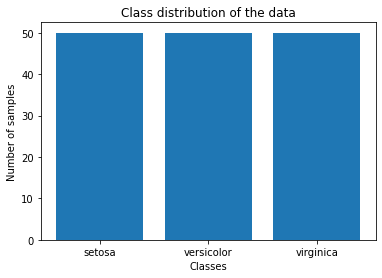

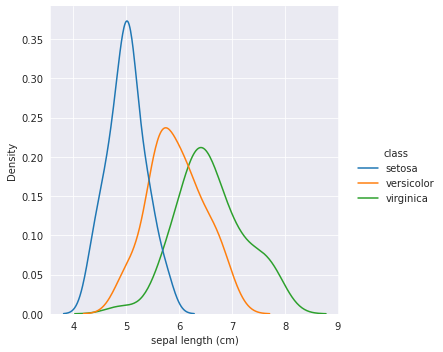

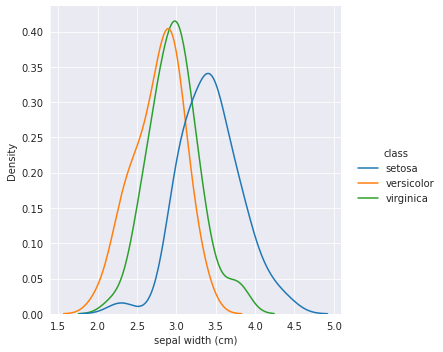

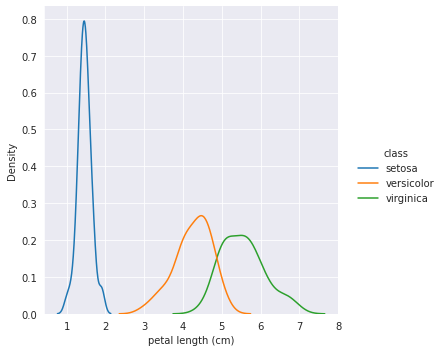

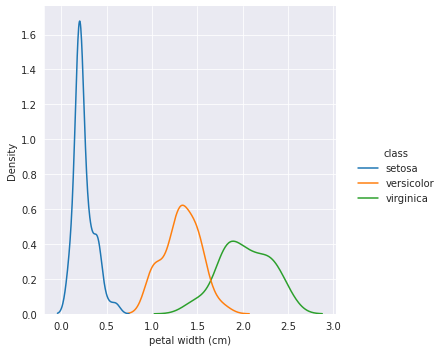

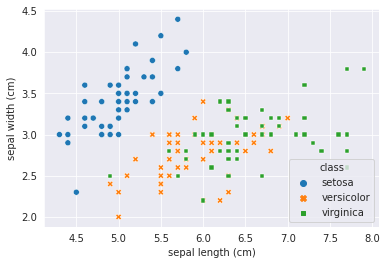

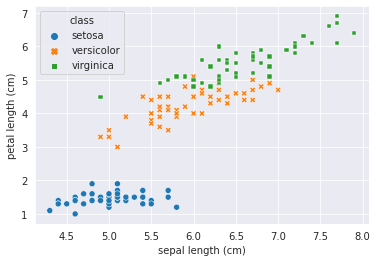

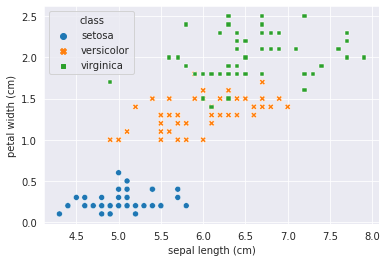

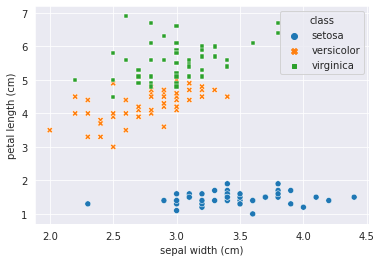

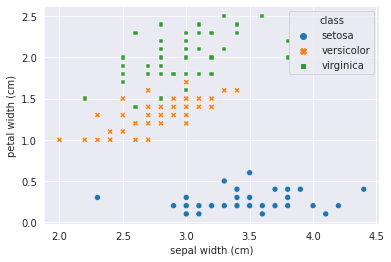

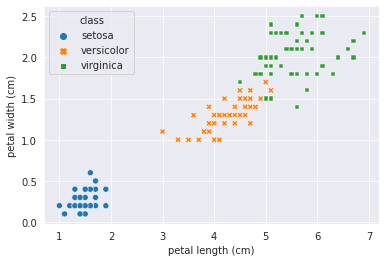

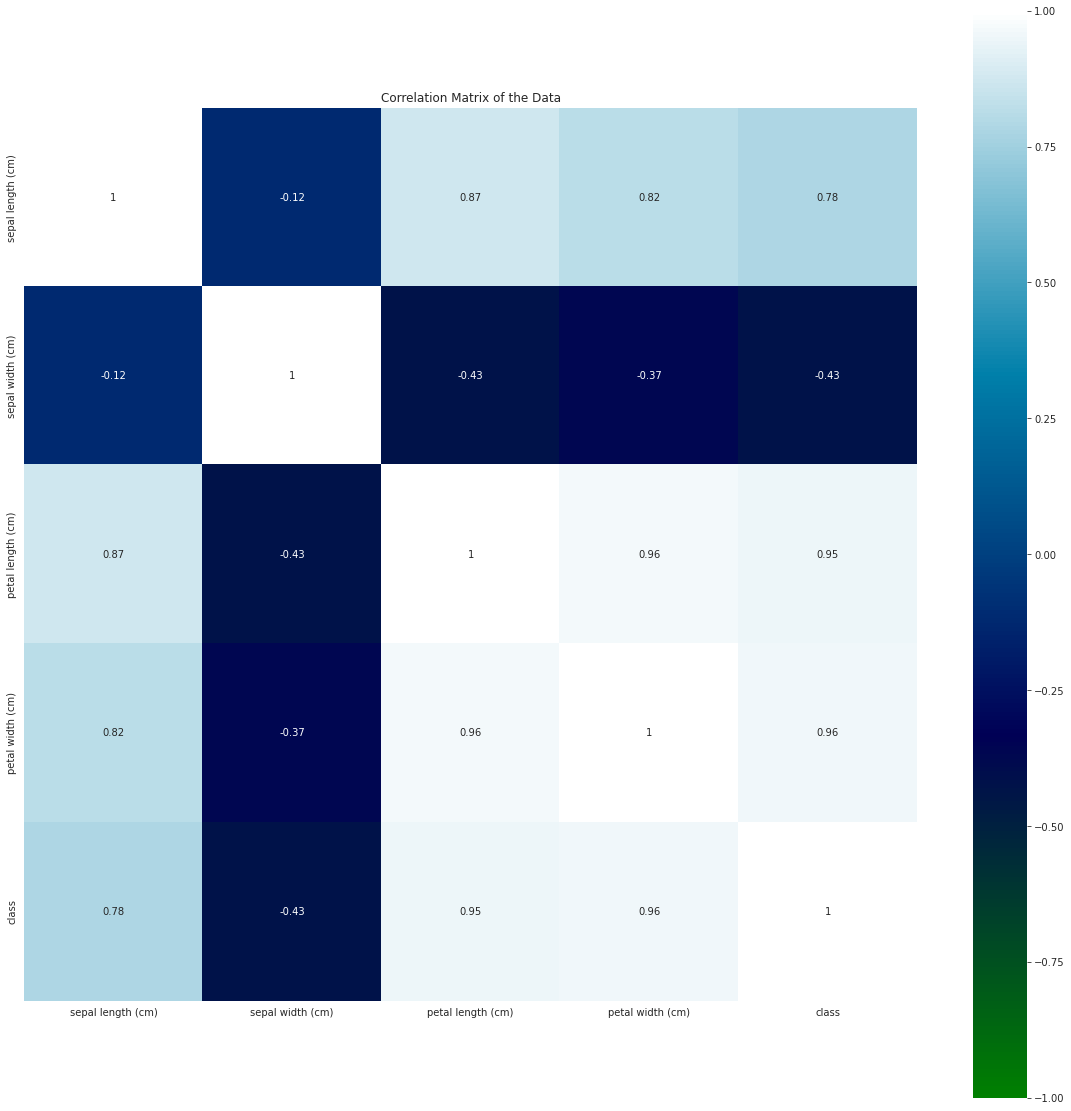

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


DATA_PATH = 'iris.data'


def read_data(file_path: str):
  """
  Reads the data from the data file.
  
  :param file_path: absolute path to the data file
  :type file_path: str
  :return dataframe: a pd.DataFrame object with the data
  :rtype: pd.DataFrame
  """
  dataframe = pd.read_csv(file_path, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'])
  # Changing class names from Iris-class_name to class_name
  dataframe['class'] = dataframe['class'].replace({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})

  return dataframe


def visualize_class_distribution(dataframe: pd.DataFrame):
  """
  Visualizes the data distribution over the classes

  :param dataframe: the pd.DataFrame object with the data
  :type dataframe: pd.DataFrame
  :returns: None
  """
  setosa_counter = 0
  versicolor_counter = 0
  virginica_counter = 0

  data = df.values.tolist()
  for el in data:
    if el[-1] == 'setosa':
      setosa_counter += 1
    elif el[-1] == 'versicolor':
      versicolor_counter += 1
    else:
      virginica_counter += 1

  classes = ['setosa', 'versicolor', 'virginica']
  values = [setosa_counter, versicolor_counter, virginica_counter]

  plt.bar(classes, values)
  plt.title('Class distribution of the data')
  plt.xlabel('Classes')
  plt.ylabel('Number of samples')
  plt.show()


if __name__ == '__main__':
  df = read_data(DATA_PATH)

  # Now that we have the data we are going to do some data analysis and exploration
  print(f'Are missing values present in the dataset: {df.isnull().values.any()}')
  print('')
  print(f'Are duplicate entries (rows) present in the dataset: {df.duplicated().values.any()}')
  print('')
  print('Duplicated rows are:')
  print(df[df.duplicated(keep=False)])
  print('')

  # Duplicate entries are rows with indexes 9, 34 and 37 (setosa class)
  # Also, we have duplicate entries from the virginica class (rows with indexes 101 and 142)
  # In the dataset description it is referred that samples 35 and 38 have errors and corrections should be made on the suitable attributes
  sample_35 = df.iloc[34].to_list()
  sample_38 = df.iloc[37].to_list()
  
  sample_35[3] = 0.2  # petal width for sample 35 should be 0.2 cm, not 0.1 cm
  sample_38[1] = 3.6  # sepal width for sample 38 should be 3.6 cm, not 3.1 cm
  sample_38[2] = 1.4  # petal length for sample 38 should be 1.4 cm, not 1.5 cm

  df.iloc[34] = sample_35
  df.iloc[37] = sample_38

  print('Duplicated rows after sample corrections:')
  print(df[df.duplicated(keep=False)])
  print('')
  # Since the data comes from the real world (real plants), we are not going to remove the virginica duplicate
  # Removing it changes the image of the real world

  # Visualizing data distribution over the classes
  visualize_class_distribution(df)
  print('')
  ## We have an uniform distribution of the data over the classes

  # Visualizing data distributions of each attribute over the classes
  sns.set_style('darkgrid')
  sns.displot(data=df, x='sepal length (cm)', hue='class', kind='kde')
  plt.show()
  print('')
  sns.displot(data=df, x='sepal width (cm)', hue='class', kind='kde')
  plt.show()
  print('')
  sns.displot(data=df, x='petal length (cm)', hue='class', kind='kde')
  plt.show()
  print('')
  sns.displot(data=df, x='petal width (cm)', hue='class', kind='kde')
  plt.show()
  print('')

  # Visualizing relationships between each of the attributes over the classes
  sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='class', style='class')
  plt.show()
  print('')
  sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='class', style='class')
  plt.show()
  print('')
  sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue='class', style='class')
  plt.show()
  print('')
  sns.scatterplot(data=df, x='sepal width (cm)', y='petal length (cm)', hue='class', style='class')
  plt.show()
  print('')
  sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue='class', style='class')
  plt.show()
  print('')
  sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='class', style='class')
  plt.show()
  print('')
  ## In the dataset description it was noted that one of the classes was linearly separable from the other two classes (the two classes are not linearly separable from each other)
  ## From the visualizations we can conclude that the setosa class is linearly separable from the versicolor and virginica classes

  # Visualizing a correlation matrix of the attributes
  ## Encoding the classes
  classes = df['class'].tolist()
  classes = list(set(classes))
  encoder = LabelEncoder()
  encoded = encoder.fit_transform(classes)

  encoded_dict = dict()
  encoded_dict[classes[0]] = encoded[0]
  encoded_dict[classes[1]] = encoded[1]
  encoded_dict[classes[2]] = encoded[2]
  df['class'] = df['class'].replace(encoded_dict)

  fig, ax = plt.subplots(figsize=(20, 20))
  ax.set_title('Correlation Matrix of the Data')
  sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, square=True, xticklabels=True, yticklabels=True, cmap='ocean', ax=ax)
  plt.show()
  print('')

In [2]:
# Extracting some useful data from the dataset
if __name__ == '__main__':
  print(f'Average sepal length of the setosa plants: {round(df.groupby("class")["sepal length (cm)"].mean().iloc[0], 3)} cm')
  print(f'Average petal width of the versicolor plants: {round(df.groupby("class")["petal width (cm)"].mean().iloc[1], 3)} cm')
  print(f'Maximum petal length of the virginica plants: {round(df.groupby("class")["petal length (cm)"].max().iloc[2], 3)} cm')
  print('')

  print('Average values of attributes for class 0 (setosa plants):')
  data = df[df['class'] == 0].groupby('class').agg(
      avg_sepal_length=pd.NamedAgg(column='sepal length (cm)', aggfunc=np.mean),
      avg_sepal_width=pd.NamedAgg(column='sepal width (cm)', aggfunc=np.mean),
      avg_petal_length=pd.NamedAgg(column='petal length (cm)', aggfunc=np.mean),
      avg_petal_width=pd.NamedAgg(column='petal width (cm)', aggfunc=np.mean)
  )
  print(data)
  print('')

  print('Some characteristics of the attributes of class 1 (versicolor plants):')
  data = df[df['class'] == 1].groupby('class').agg(
      min_sepal_width=pd.NamedAgg(column='sepal width (cm)', aggfunc=min),
      max_sepal_length=pd.NamedAgg(column='sepal length (cm)', aggfunc=max),
      avg_petal_length=pd.NamedAgg(column='petal length (cm)', aggfunc=np.mean),
      std_petal_width=pd.NamedAgg(column='petal width (cm)', aggfunc=np.std)
  )
  print(data)
  print('')

  print('Some characteristics of the attributes of class 2 (virginica plants):')
  data = df[df['class'] == 2].groupby('class').agg(
      avg_sepal_length=pd.NamedAgg(column='sepal length (cm)', aggfunc=np.mean),
      std_sepal_width=pd.NamedAgg(column='sepal width (cm)', aggfunc=np.mean),
      min_petal_length=pd.NamedAgg(column='petal length (cm)', aggfunc=min),
      max_petal_width=pd.NamedAgg(column='petal width (cm)', aggfunc=max)
  )
  print(data)

Average sepal length of the setosa plants: 5.006 cm
Average petal width of the versicolor plants: 1.326 cm
Maximum petal length of the virginica plants: 6.9 cm

Average values of attributes for class 0 (setosa plants):
       avg_sepal_length  avg_sepal_width  avg_petal_length  avg_petal_width
class                                                                      
0                 5.006            3.428             1.462            0.246

Some characteristics of the attributes of class 1 (versicolor plants):
       min_sepal_width  max_sepal_length  avg_petal_length  std_petal_width
class                                                                      
1                  2.0               7.0              4.26         0.197753

Some characteristics of the attributes of class 2 (virginica plants):
       avg_sepal_length  std_sepal_width  min_petal_length  max_petal_width
class                                                                      
2                 6.588       

In [3]:
# Classifying using Multilayer Perceptron and Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


def split_data_and_classes(dataframe: pd.DataFrame):
  dataset = dataframe.values.tolist()
  data, classes = [el[:-1] for el in dataset], [el[-1] for el in dataset]
  data, classes = np.array(data), np.array(classes)

  return data, classes


if __name__ == '__main__':
  X, y = split_data_and_classes(df)
  train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=0)

  neural_network = MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes=3, learning_rate_init=0.005, random_state=0, verbose=0, max_iter=1000)
  neural_network.fit(train_X, train_Y)
  print(f'Mean accuracy on the test data (MLPClassifier): {round(neural_network.score(test_X, test_Y), 3)}')

  gaussian_naive_bayes = GaussianNB()
  gaussian_naive_bayes.fit(train_X, train_Y)
  print(f'Mean accuracy on the test data (Gaussian NB): {round(gaussian_naive_bayes.score(test_X, test_Y), 3)}')

Mean accuracy on the test data (MLPClassifier): 0.978
Mean accuracy on the test data (Gaussian NB): 1.0
